In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME', 'ASK_AMT'.
application_df = application_df.drop(["EIN"], axis=1)

In [3]:
# view the dataframe
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
print(application_df.nunique())


NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64


In [6]:
# chacking value_counts for NAMES feature

name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                         1260
TOPS CLUB INC                                                   765
UNITED STATES BOWLING CONGRESS INC                              700
WASHINGTON STATE UNIVERSITY                                     492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                 408
                                                               ... 
EQUALITY CHAMBER OF COMMERCE OF COLORADO SPRINGS                  1
WILDLIFE REHABILITATION CENTER OF NORTHERN UTAH                   1
NATIONAL PUERTO RICAN LEADERSHIP COUNCIL EDUCATION FUND INC       1
ANTELOPE VALLEY GIRLS SOFTBALL ASSOCIATION                        1
TOGETHER HAPPY AND FOREVER FOUNDATION CORP                        1
Name: NAME, Length: 19568, dtype: int64

In [7]:
# replacing names with less than 5 occurances with "other"

names_to_replace = list(name_counts[name_counts<5].index)

for name in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
INTERNATIONAL WOMENS INSOLVENCY & RESTRUCTURING CONFEDERATION INC        5
GUILDS OF THE SANTA FE OPERA INC                                         5
HIGH TWELVE INTERNATIONAL                                                5
GERONTOLOGICAL ADVANCED PRACTICE NURSES ASSOCIATION                      5
VETERANS OF FOREIGN WARS OF THE UNITED STATES DEPT OF COLORADO           5
Name: NAME, Length: 403, dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ["T9", "T13", "T12", "T2", "T25", "T14", "T29", "T15", "T17"]

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4200        1
C1580        1
C1728        1
C1900        1
C2561        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
vc = application_df["CLASSIFICATION"].value_counts().loc[lambda x : x>1]
vc

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
C1235        9
C7210        7
C2400        6
C1720        6
C4100        6
C1600        5
C1257        5
C1260        3
C0           3
C2710        3
C1267        2
C3200        2
C1234        2
C1246        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
x = ["C1000", "C2000", "C1200", "C3000", "C2100"]

In [13]:
# use the variable name `classifications_to_replace`
classifications_to_replace = []
for i in application_df["CLASSIFICATION"]:
    if i not in x:
        classifications_to_replace.append(i)
    else:
        pass            

In [14]:
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, dtype=float)

In [18]:
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# checking value_counts of our target variable
application_df["IS_SUCCESSFUL"].value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [20]:
# moving is_successfull column to end

application_df = application_df.reindex(columns=[col for col in application_df.columns if col != "IS_SUCCESSFUL"]+['IS_SUCCESSFUL'])
application_df.head()

,STATUS,ASK_AMT,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,IS_SUCCESSFUL
0,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [23]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"]

X = application_df.drop("IS_SUCCESSFUL", axis=1)
feature_names = X.columns
X.head()


,STATUS,ASK_AMT,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# assigning number of features to a variable
input_dimension = len(X_train_scaled[0])

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# to start with, going with 6 neurons each into 2 input layers and 1 output layer

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=input_dimension))

nn_model.add(tf.keras.layers.Dense(units=6, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 2682      
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 2,731
Trainable params: 2,731
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 889us/step - loss: 0.5530 - accuracy: 0.7400
Epoch 2/100
804/804 [==============================] - 1s 874us/step - loss: 0.4560 - accuracy: 0.7873
Epoch 3/100
804/804 [==============================] - 1s 854us/step - loss: 0.4400 - accuracy: 0.7906
Epoch 4/100
804/804 [==============================] - 1s 856us/step - loss: 0.4338 - accuracy: 0.7921
Epoch 5/100
804/804 [==============================] - 1s 875us/step - loss: 0.4318 - accuracy: 0.7933
Epoch 6/100
804/804 [==============================] - 1s 889us/step - loss: 0.4302 - accuracy: 0.7942
Epoch 7/100
804/804 [==============================] - 1s 868us/step - loss: 0.4291 - accuracy: 0.7950
Epoch 8/100
804/804 [==============================] - 1s 872us/step - loss: 0.4283 - accuracy: 0.7963
Epoch 9/100
804/804 [==============================] - 1s 884us/step - loss: 0.4276 - accuracy: 0.7956
Epoch 10/100
804/804 [==============================] - 1s 903us/step - l

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4627 - accuracy: 0.7900 - 306ms/epoch - 1ms/step
Loss: 0.4627164602279663, Accuracy: 0.789970874786377


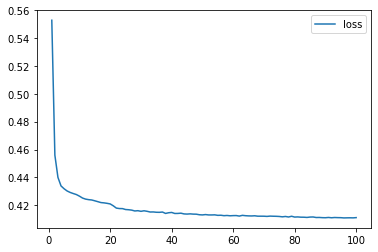

In [31]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

In [35]:
# lets try with increasing number of layers and neurons
nn_model2 = tf.keras.models.Sequential()

nn_model2.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=input_dimension))

nn_model2.add(tf.keras.layers.Dense(units=25, activation="relu"))

nn_model2.add(tf.keras.layers.Dense(units=35, activation="relu"))

nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model2.fit(X_train_scaled, y_train, epochs=25)


Epoch 1/25
804/804 [==============================] - 1s 958us/step - loss: 0.4971 - accuracy: 0.7621
Epoch 2/25
804/804 [==============================] - 1s 960us/step - loss: 0.4307 - accuracy: 0.7950
Epoch 3/25
804/804 [==============================] - 1s 949us/step - loss: 0.4246 - accuracy: 0.7972
Epoch 4/25
804/804 [==============================] - 1s 1ms/step - loss: 0.4221 - accuracy: 0.7996
Epoch 5/25
804/804 [==============================] - 1s 1ms/step - loss: 0.4206 - accuracy: 0.7989
Epoch 6/25
804/804 [==============================] - 1s 1ms/step - loss: 0.4191 - accuracy: 0.7978
Epoch 7/25
804/804 [==============================] - 1s 1ms/step - loss: 0.4179 - accuracy: 0.7989
Epoch 8/25
804/804 [==============================] - 1s 1ms/step - loss: 0.4174 - accuracy: 0.8012
Epoch 9/25
804/804 [==============================] - 1s 1ms/step - loss: 0.4166 - accuracy: 0.8010
Epoch 10/25
804/804 [==============================] - 1s 1ms/step - loss: 0.4158 - accuracy: 

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4627 - accuracy: 0.7900 - 212ms/epoch - 790us/step
Loss: 0.4627164602279663, Accuracy: 0.789970874786377


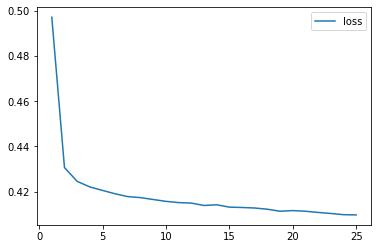

In [40]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

In [43]:
# Export our model to HDF5 file

nn_model2.save('AlphabetSoupCharity_Optimization.h5')

# Summary

By bringing back the Names column, we are able to improve the accuracy of our model significantly.